In [1]:
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("Datasets/advertising.csv")
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


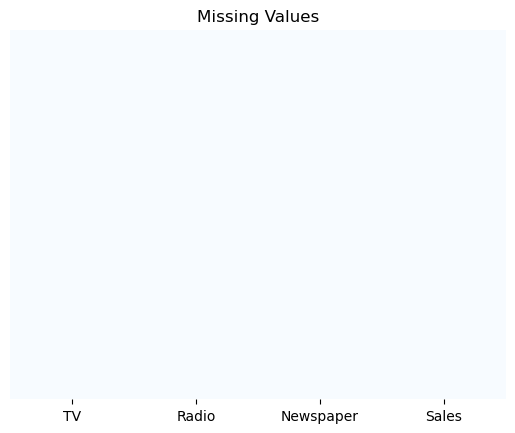

In [7]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="Blues")
plt.title("Missing Values")
plt.show()

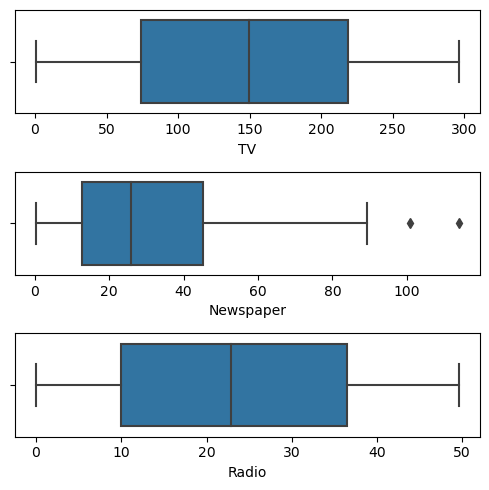

In [8]:
fig,axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(df["TV"],ax=axs[0])
plt2 = sns.boxplot(df["Newspaper"],ax=axs[1])
plt3 = sns.boxplot(df["Radio"],ax=axs[2])
plt.tight_layout()

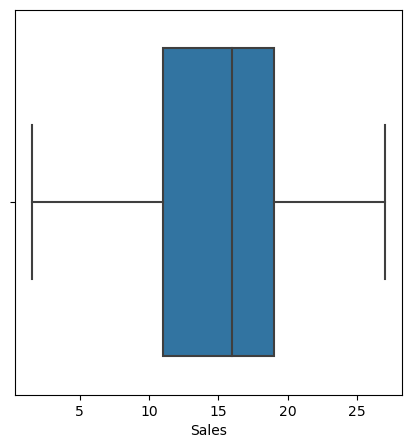

In [9]:
plt.figure(figsize=(5,5))
sns.boxplot(df["Sales"])
plt.show()

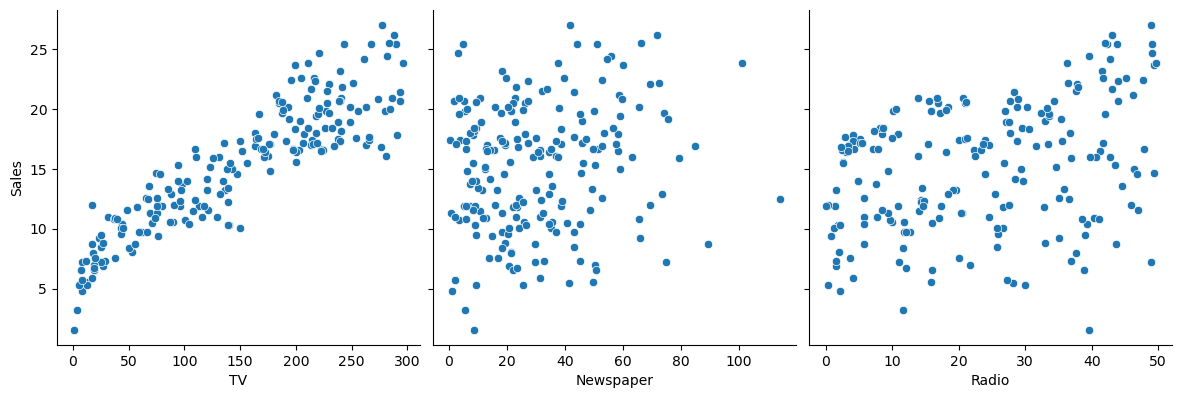

In [10]:
sns.pairplot(df, x_vars=["TV","Newspaper","Radio"],y_vars="Sales",height=4,aspect=1, kind="scatter")
plt.show()

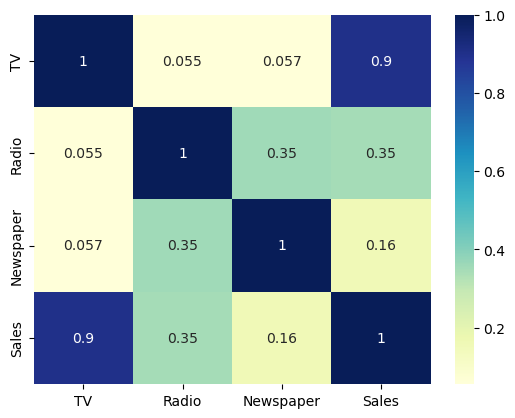

In [11]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [12]:
x = df["TV"]
y = df["Sales"]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.7, random_state=42)

In [14]:
x_train.head()

180    156.6
178    276.7
185    205.0
49      66.9
80      76.4
Name: TV, dtype: float64

In [15]:
y_train.head()

180    15.5
178    16.8
185    22.6
49      9.7
80     11.8
Name: Sales, dtype: float64

In [16]:
import statsmodels.api as sm

In [17]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_sm).fit()

In [18]:
lr.params

const    6.967258
TV       0.055607
dtype: float64

In [19]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     221.0
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           1.92e-21
Time:                        05:51:51   Log-Likelihood:                -137.65
No. Observations:                  60   AIC:                             279.3
Df Residuals:                      58   BIC:                             283.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9673      0.645     10.808      0.0

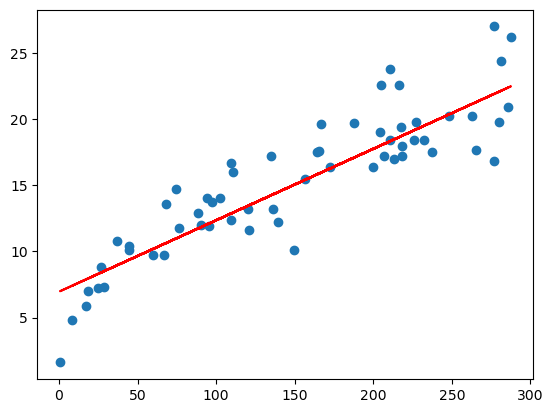

In [20]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948+0.054*x_train,"r")
plt.show()

In [21]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred )

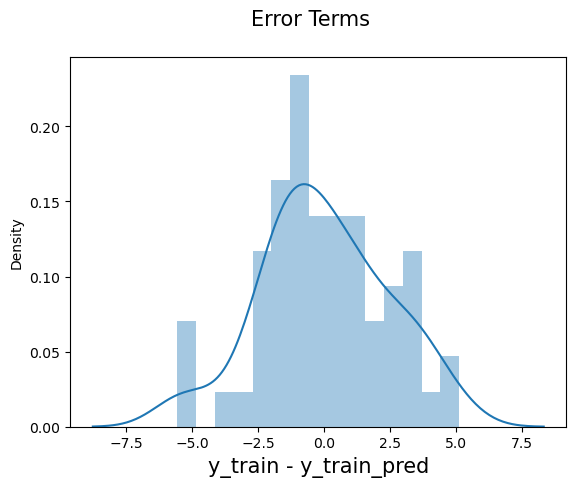

In [22]:
fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

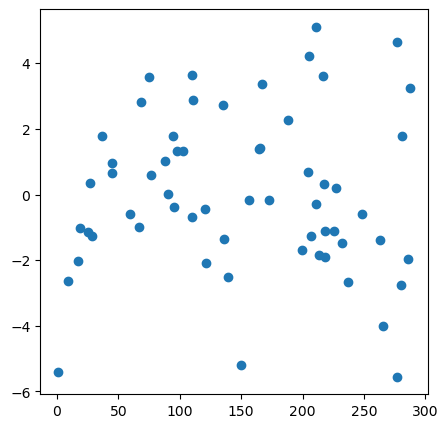

In [23]:
plt.figure (figsize=(5,5))
plt.scatter(x_train,res)
plt.show()

In [24]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict (x_test_sm)

In [25]:
y_pred.head()

95     16.047889
15     17.832875
30     23.254562
158     7.617860
128    19.217490
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.2331846738376786

In [28]:
r_squared = r2_score(x_test,y_test)
r_squared

-2.187572804862923

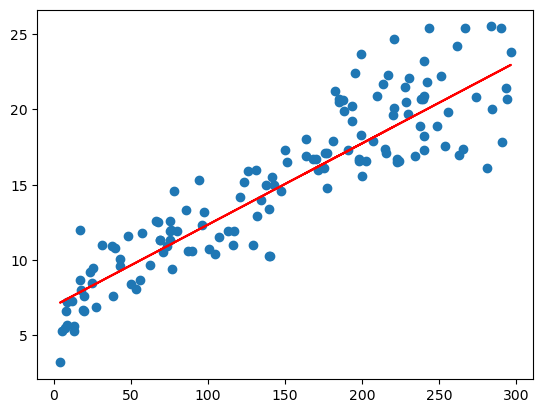

In [36]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()